In [193]:
import pandas as pd, numpy as np,seaborn as sns,matplotlib.pyplot as plt,plotly.express as px
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [194]:
#Read the load the data
data=pd.read_csv('../input/infoseccyber-security-salaries/Cyber_salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Information Security Officer,68000,EUR,72762,DE,100,DE,S
1,2022,SE,FT,Security Officer,123400,USD,123400,US,0,US,M
2,2022,SE,FT,Security Officer,88100,USD,88100,US,0,US,M
3,2022,SE,FT,Security Engineer,163575,USD,163575,US,100,US,M
4,2022,SE,FT,Security Engineer,115800,USD,115800,US,100,US,M


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1349 non-null   int64 
 1   experience_level    1349 non-null   object
 2   employment_type     1349 non-null   object
 3   job_title           1349 non-null   object
 4   salary              1349 non-null   int64 
 5   salary_currency     1349 non-null   object
 6   salary_in_usd       1349 non-null   int64 
 7   employee_residence  1349 non-null   object
 8   remote_ratio        1349 non-null   int64 
 9   company_location    1349 non-null   object
 10  company_size        1349 non-null   object
dtypes: int64(4), object(7)
memory usage: 116.1+ KB


In [196]:
data.describe().style.background_gradient(cmap='ocean')

,work_year,salary,salary_in_usd,remote_ratio
count,1349.000000,1349.000000,1349.000000,1349.000000
mean,2021.368421,528824.761305,121578.622683,72.238695
std,0.711236,13613665.810463,68972.954838,39.355331
min,2020.000000,1740.000000,2000.000000,0.000000
25%,2021.000000,80000.000000,75000.000000,50.000000
50%,2022.000000,120000.000000,115000.000000,100.000000
75%,2022.000000,160080.000000,152000.000000,100.000000
max,2022.000000,500000000.000000,899920.000000,100.000000


In [197]:
corr=data.corr().style.background_gradient(cmap='rainbow')
corr

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,0.024064,0.191355,0.143046
salary,0.024064,1.000000,-0.032898,0.017917
salary_in_usd,0.191355,-0.032898,1.000000,0.185180
remote_ratio,0.143046,0.017917,0.185180,1.000000


In [198]:
data.shape

(1349, 11)

<AxesSubplot:>

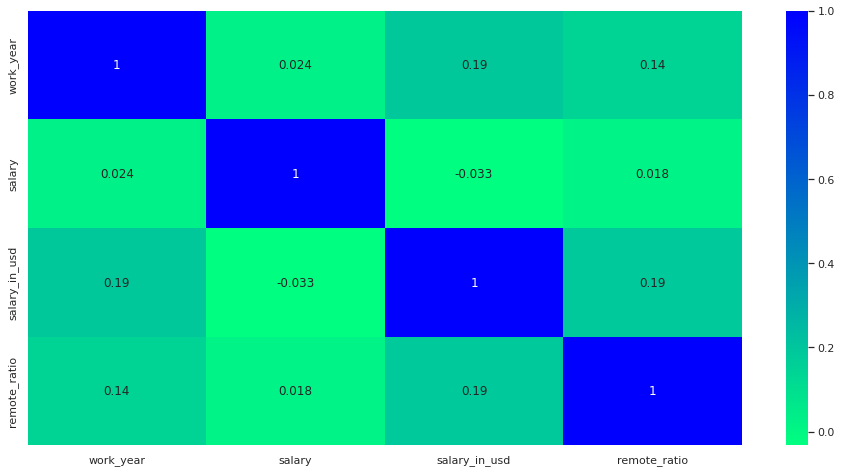

In [199]:
#visualize the correlation matrix
sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(data.corr(),annot=True,cmap='winter_r')

In [200]:
#Check the null values in the data
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Explore data analysis

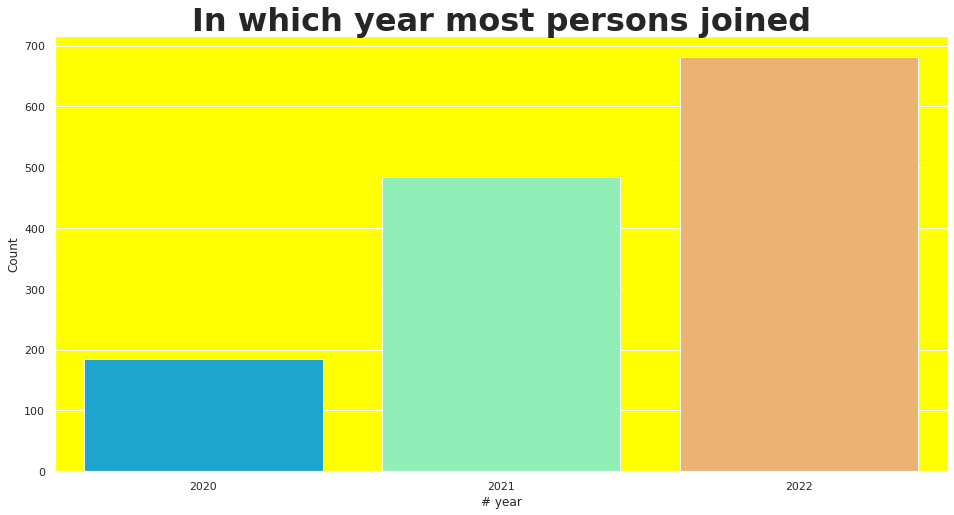

In [201]:
#Let's visualize the year in the data
work=data['work_year'].value_counts()
ax=plt.axes()
ax.set(facecolor='yellow')
sns.set(rc={'figure.figsize':(6,5)})
ax.set_title("In which year most persons joined",fontsize=32,fontweight='bold')
sns.barplot(x=work.index,y=work.values,palette='rainbow')
plt.xlabel("# year")
plt.ylabel("Count")
plt.show()

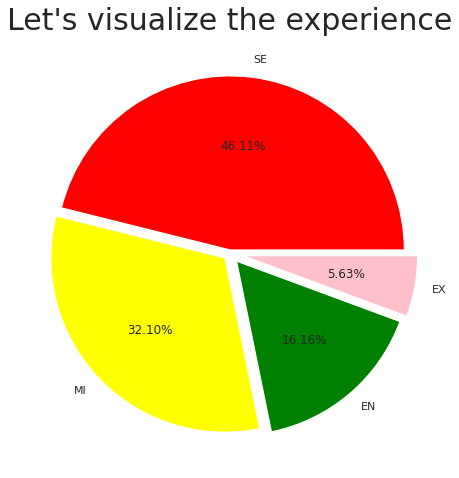

In [202]:
experience=data['experience_level'].value_counts()
plt.figure(figsize=(16,8))
plt.pie(experience,labels=['SE','MI','EN','EX'],explode=[0.02,0.04,0.06,0.08],autopct='%1.2f%%',colors=['red','yellow','green','pink'])
plt.title("Let's visualize the experience",fontsize=30)
plt.show()

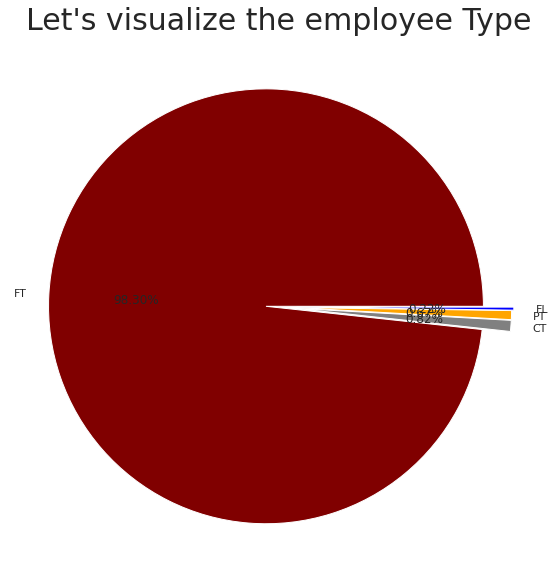

In [203]:
employee_type=data['employment_type'].value_counts()
plt.figure(figsize=(20,10))
plt.pie(employee_type,labels=['FT','CT','PT','FL'],explode=[0.06,0.07,0.07,0.08],autopct='%1.2f%%',colors=['maroon','gray','orange','blue'])
plt.title("Let's visualize the employee Type",fontsize=30)
plt.show()

In [204]:
salaray=data.groupby(['salary_in_usd','employment_type']).size().reset_index().sort_values(by='salary_in_usd',ascending=False)
salaray.head()

,salary_in_usd,employment_type,0
629,899920,FT,1
628,600000,FT,2
627,500000,FT,1
626,456621,FT,1
625,450000,FT,1


In [205]:
fig=px.histogram(salaray,x='salary_in_usd',color='employment_type',title="To visualize the salary_in_used with employment type")
fig.update_layout(bargap=0.5,plot_bgcolor='darkgreen')
fig.show()

In [206]:
job=data.groupby(['salary_in_usd','job_title']).size().reset_index().sort_values(by='salary_in_usd',ascending=False)
job.head()

,salary_in_usd,job_title,0
1079,899920,Detection Engineer,1
1078,600000,Security Engineering Manager,1
1077,600000,Incident Response Manager,1
1076,500000,Security Researcher,1
1075,456621,Ethical Hacker,1


In [207]:
fig=px.histogram(job[:500],x='salary_in_usd',color='job_title',title="To visualize the salary_in_used with job_title")
fig.update_layout(bargap=0.5,plot_bgcolor='blue')
fig.show()

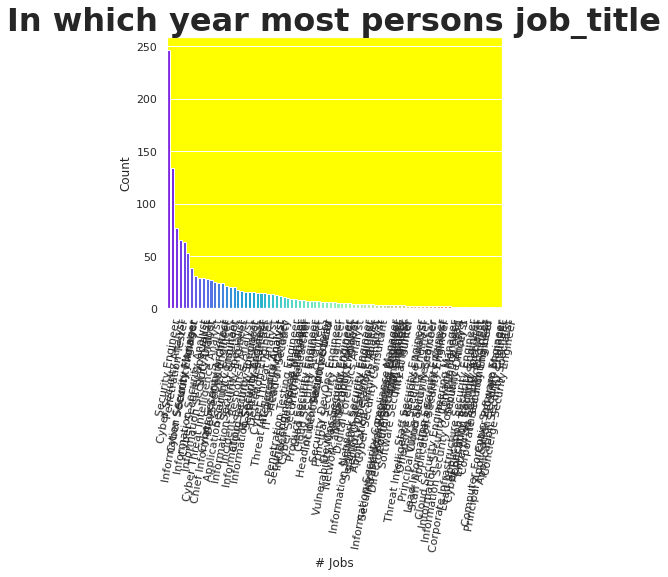

In [208]:
#Let's visualize the year in the data
job=data['job_title'].value_counts()
ax=plt.axes()
ax.set(facecolor='yellow')
sns.set(rc={'figure.figsize':(16,8)})
ax.set_title("In which year most persons job_title",fontsize=32,fontweight='bold')
sns.barplot(x=job.index,y=job.values,palette='rainbow')
plt.xlabel("# Jobs")
plt.xticks(rotation=80)
plt.ylabel("Count")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='employee_residence', ylabel='count'>

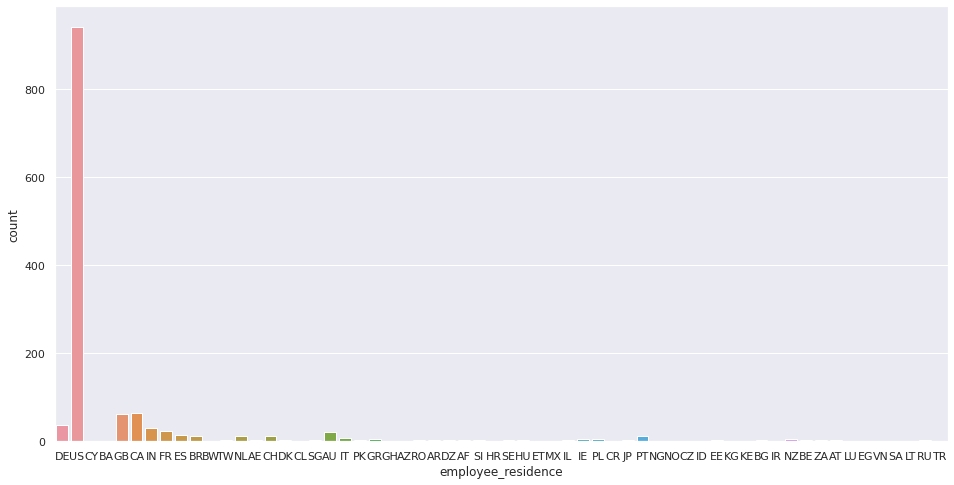

In [209]:
# To visualize the employee_residence
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(data['employee_residence'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='company_size', ylabel='count'>

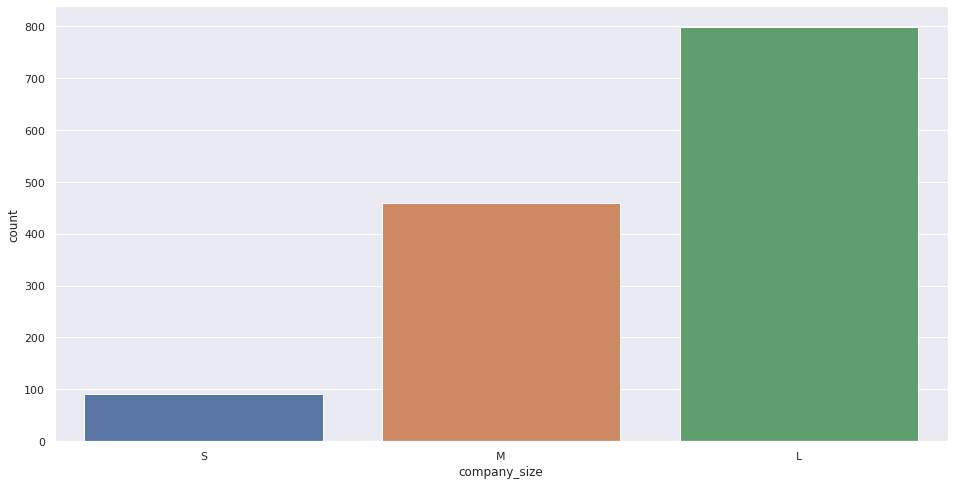

In [210]:
# To visualize the employee_residence
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(data['company_size'])

In [211]:
company=data.groupby(['salary_in_usd','job_title','company_size']).size().reset_index().sort_values(by='salary_in_usd',ascending=False)
company.head()

,salary_in_usd,job_title,company_size,0
1142,899920,Detection Engineer,L,1
1141,600000,Security Engineering Manager,L,1
1140,600000,Incident Response Manager,L,1
1139,500000,Security Researcher,L,1
1138,456621,Ethical Hacker,L,1


In [212]:
fig=px.scatter(company,x='salary_in_usd',y='job_title',color='company_size',title="To visualize the salary_in_used with job_title")
fig.update_layout(bargap=0.5,plot_bgcolor='gray')
fig.show()

# Label Encoding

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1349 non-null   int64 
 1   experience_level    1349 non-null   object
 2   employment_type     1349 non-null   object
 3   job_title           1349 non-null   object
 4   salary              1349 non-null   int64 
 5   salary_currency     1349 non-null   object
 6   salary_in_usd       1349 non-null   int64 
 7   employee_residence  1349 non-null   object
 8   remote_ratio        1349 non-null   int64 
 9   company_location    1349 non-null   object
 10  company_size        1349 non-null   object
dtypes: int64(4), object(7)
memory usage: 116.1+ KB


In [214]:
#install the labelencoder
label=LabelEncoder()
data['experience_level']=label.fit_transform(data['experience_level'])
data['employment_type']=label.fit_transform(data['employment_type'])
data['job_title']=label.fit_transform(data['job_title'])
data['salary_currency']=label.fit_transform(data['salary_currency'])
data['employee_residence']=label.fit_transform(data['employee_residence'])
data['company_location']=label.fit_transform(data['company_location'])
data['company_size']=label.fit_transform(data['company_size'])


# Modeling

In [215]:
#Diveded the data into X and y
X=data.drop(['salary','salary_in_usd'],axis=1)
y=data['salary']

In [216]:
# #normalize the data
scaler=StandardScaler()
#Let's normalize the train dataset
X=scaler.fit_transform(X)

In [217]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [218]:
#Linearregression
linear=LinearRegression()
#fit the train dataset
linear.fit(X_train,y_train)
#prediction
linear_pred=linear.predict(X_test)


In [219]:
print(f'The Test_accuracy: {linear.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {linear.score(X_train,y_train)*100:.2f}')

The Test_accuracy: -17601.31
The Train_accuracy: 0.45


In [220]:
mse=mean_squared_error(y_test,linear_pred)
rmse=np.sqrt(mse)
print(f'The r2_score is {r2_score(y_test,linear_pred)*100:.2f}')
print(f'the mean_squared_erro is {rmse}')

The r2_score is -17601.31
the mean_squared_erro is 987033.6031287238


In [221]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
#fit the data
tree.fit(X_train,y_train)
#prediction
tree_pred=tree.predict(X_test)

In [222]:
mse=mean_squared_error(y_test,tree_pred)
rmse=np.sqrt(mse)
print(f'The r2_score is {r2_score(y_test,tree_pred)*100:.2f}')
print(f'the mean_squared_erro is {rmse}')

The r2_score is 33.63
the mean_squared_erro is 60436.85685134504


In [223]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor(n_estimators=500)
#fit the train
random.fit(X_train,y_train)
#prediction
random_pred=random.predict(X_test)

In [224]:
mse=mean_squared_error(y_test,random_pred)
rmse=np.sqrt(mse)
print(f'The r2_score is {r2_score(y_test,random_pred)*100:.2f}')
print(f'the mean_squared_erro is {rmse}')

The r2_score is 45.62
the mean_squared_erro is 54710.04752851234


In [225]:
from xgboost import XGBRegressor
#install the 
xgb=XGBRegressor()
#fit the train
xgb.fit(X_train,y_train)
#Prediction
xgb_pred=xgb.predict(X_test)

In [226]:
mse=mean_squared_error(y_test,xgb_pred)
rmse=np.sqrt(mse)
print(f'The r2_score is {r2_score(y_test,xgb_pred)*100:.2f}')
print(f'the mean_squared_erro is {rmse}')

The r2_score is 37.36
the mean_squared_erro is 58715.768851799934


In [227]:
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
gbr=GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=8, random_state=42
                                ,loss='ls', min_samples_split=5)
# Fit the model to the data
gbr.fit(X_train,y_train)
#Prediction of the test data
gbr_pred=gbr.predict(X_test)


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



In [228]:
mse=mean_squared_error(y_test,gbr_pred)
rmse=np.sqrt(mse)
print(f'The r2_score is {r2_score(y_test,gbr_pred)*100:.2f}')
print(f'the mean_squared_erro is {rmse}')

The r2_score is 28.35
the mean_squared_erro is 62798.46941867436


In [229]:
from sklearn.svm import SVR
svm = SVR(C=1.0)
svm.fit(X_train,y_train)
#Prediction
svm_pred=svm.predict(X_test)

In [230]:
mse=mean_squared_error(y_test,svm_pred)
rmse=np.sqrt(mse)
print(f'The r2_score is {r2_score(y_test,svm_pred)*100:.2f}')
print(f'the mean_squared_erro is {rmse}')

The r2_score is -2.91
the mean_squared_erro is 75259.67499410486


In [231]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import tensorflow as tf

In [233]:
classifier=tf.keras.models.Sequential()
#Adding the first input layer
classifier.add(tf.keras.layers.Dense(units=11,activation='relu'))
#Adding the second input layer
classifier.add(tf.keras.layers.Dense(units=15,activation='relu'))
#Adding the therid input layes
classifier.add(tf.keras.layers.Dense(units=20,activation='relu'))
#Adding the fourth input layers
classifier.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Out put layes
classifier.compile(optimizer='adam',loss='mse',metrics=['accuracy','mse'])

In [234]:
#fit the model to train data with 20 epochs
model_history=classifier.fit(X_train,y_train,validation_split=0.3,batch_size=10,epochs=20)

Epoch 1/20
85/85 [==============================] - 1s 4ms/step - loss: 294652204810240.0000 - accuracy: 0.0000e+00 - mse: 294652204810240.0000 - val_loss: 114600861696.0000 - val_accuracy: 0.0000e+00 - val_mse: 114600861696.0000
Epoch 2/20
85/85 [==============================] - 0s 2ms/step - loss: 294652171255808.0000 - accuracy: 0.0000e+00 - mse: 294652204810240.0000 - val_loss: 114600853504.0000 - val_accuracy: 0.0000e+00 - val_mse: 114600853504.0000
Epoch 3/20
85/85 [==============================] - 0s 3ms/step - loss: 294652171255808.0000 - accuracy: 0.0000e+00 - mse: 294652171255808.0000 - val_loss: 114600845312.0000 - val_accuracy: 0.0000e+00 - val_mse: 114600845312.0000
Epoch 4/20
85/85 [==============================] - 0s 2ms/step - loss: 294652171255808.0000 - accuracy: 0.0000e+00 - mse: 294652171255808.0000 - val_loss: 114600845312.0000 - val_accuracy: 0.0000e+00 - val_mse: 114600845312.0000
Epoch 5/20
85/85 [==============================] - 0s 3ms/step - loss: 29465213